In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 80.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
import folium
import cartopy.crs as ccrs
from sklearn.utils import resample
from cartopy.feature import NaturalEarthFeature
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/FelAmore/Data-Science-Final-Project/main/tsunami_data.csv')

DATA INFO

In [ ]:
data.head()

Year    Mo    Dy  Tsunami Event Validity  Tsunami Cause Code  \
0  1751.0   5.0  20.0                     4.0                 3.0   
1  1751.0   5.0  25.0                     4.0                 1.0   
2  1751.0  10.0  18.0                     3.0                 1.0   
3  1754.0   8.0  18.0                     3.0                 1.0   
4  1754.0   9.0   1.0                     3.0                 1.0   

   Earthquake Magnitude             Country Area  Region        Location Name  \
0                   6.6               JAPAN  NaN    85.0    NW. HONSHU ISLAND   
1                   8.5               CHILE  NaN    89.0        CENTRAL CHILE   
2                   7.3  DOMINICAN REPUBLIC  NaN    74.0  AZUA  DE COMPOSTELA   
3                   6.5           INDONESIA  NaN    83.0            BANDA SEA   
4                   7.2              MEXICO  NaN    88.0            S. MEXICO   

   Latitude  Longitude  Maximum Water Height (m)  Number of Runups  \
0      37.2      138.1                      0.92               1.0   
1     -37.0      -73.0                      3.50               7.0   
2      18.5      -70.7                      0.92               3.0   
3      -3.5      128.5                      0.92               3.0   
4      16.8      -99.2                      4.00               1.0   

   Tsunami Magnitude (Iida)  Deaths  Death Description  Damage ($Mil)  \
0                       1.0  2100.0                4.0            NaN   
1                       1.8    65.0                2.0            NaN   
2                       0.6     NaN                NaN            NaN   
3                       0.6     NaN                NaN            NaN   
4                       2.0     NaN                NaN            NaN   

   Damage Description  Houses Destroyed Description  
0                 4.0                           4.0  
1                 1.0                           NaN  
2                 3.0                           3.0  
3                 NaN                           NaN  
4                 3.0                           3.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          1272 non-null   float64
 1   Mo                            1272 non-null   float64
 2   Dy                            1272 non-null   float64
 3   Tsunami Event Validity        1272 non-null   float64
 4   Tsunami Cause Code            1272 non-null   float64
 5   Earthquake Magnitude          1272 non-null   float64
 6   Country                       1272 non-null   object 
 7   Area                          129 non-null    object 
 8   Region                        1272 non-null   float64
 9   Location Name                 1272 non-null   object 
 10  Latitude                      1226 non-null   float64
 11  Longitude                     1226 non-null   float64
 12  Maximum Water Height (m)      1272 non-null   float64
 13  Num

In [ ]:
data.describe()

Year           Mo           Dy  Tsunami Event Validity  \
count  1272.000000  1272.000000  1272.000000             1272.000000   
mean   1942.352201     6.450472    15.172956                3.702830   
std      66.594491     3.454877     8.724021                0.457192   
min    1751.000000     1.000000     1.000000                3.000000   
25%    1899.000000     3.000000     8.000000                3.000000   
50%    1961.000000     7.000000    15.000000                4.000000   
75%    1998.000000     9.000000    22.000000                4.000000   
max    2023.000000    12.000000    31.000000                4.000000   

       Tsunami Cause Code  Earthquake Magnitude       Region     Latitude  \
count         1272.000000           1272.000000  1272.000000  1226.000000   
mean             1.914308              7.152673    77.437107    16.926723   
std              2.183491              0.659525    13.199461    28.106884   
min              0.000000              3.700000    30.000000   -62.877000   
25%              1.000000              6.900000    74.000000    -5.490500   
50%              1.000000              7.200000    83.000000    19.246000   
75%              1.000000              7.500000    85.000000    38.789000   
max             10.000000              9.500000    89.000000    78.370000   

         Longitude  Maximum Water Height (m)  Number of Runups  \
count  1226.000000               1272.000000       1272.000000   
mean     49.550596                  4.019033         22.911164   
std     112.042982                 18.460914        196.396552   
min    -179.971000                  0.010000          0.000000   
25%     -69.375000                  0.300000          1.000000   
50%     116.899500                  0.920000          2.000000   
75%     142.500000                  2.100000          7.000000   
max     179.444000                524.600000       6317.000000   

       Tsunami Magnitude (Iida)         Deaths  Death Description  \
count               1272.000000     176.000000         208.000000   
mean                   0.548318    2732.250000           1.966346   
std                    1.434667   17993.415058           1.156298   
min                   -4.640000       1.000000           1.000000   
25%                    0.600000       4.000000           1.000000   
50%                    0.600000      26.500000           1.000000   
75%                    0.600000     300.000000           3.000000   
max                    8.400000  227899.000000           4.000000   

       Damage ($Mil)  Damage Description  Houses Destroyed Description  
count      40.000000          384.000000                    185.000000  
mean     6647.279550            1.755208                      2.237838  
std     34971.862962            0.999986                      1.140974  
min         0.010000            1.000000                      1.000000  
25%         1.500000            1.000000                      1.000000  
50%        17.500000            1.000000                      2.000000  
75%       120.500000            2.000000                      3.000000  
max    220136.600000            4.000000                      4.000000

In [ ]:
# Checking the total null values of each column
data.isnull().sum()/data.shape[0]*100

Year                             0.000000
Mo                               0.000000
Dy                               0.000000
Tsunami Event Validity           0.000000
Tsunami Cause Code               0.000000
Earthquake Magnitude             0.000000
Country                          0.000000
Area                            89.858491
Region                           0.000000
Location Name                    0.000000
Latitude                         3.616352
Longitude                        3.616352
Maximum Water Height (m)         0.000000
Number of Runups                 0.000000
Tsunami Magnitude (Iida)         0.000000
Deaths                          86.163522
Death Description               83.647799
Damage ($Mil)                   96.855346
Damage Description              69.811321
Houses Destroyed Description    85.455975
dtype: float64

In [ ]:
data.columns

Index(['Year', 'Mo', 'Dy', 'Tsunami Event Validity', 'Tsunami Cause Code',
       'Earthquake Magnitude', 'Country', 'Area', 'Region', 'Location Name',
       'Latitude', 'Longitude', 'Maximum Water Height (m)', 'Number of Runups',
       'Tsunami Magnitude (Iida)', 'Deaths', 'Death Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed Description'],
      dtype='object')

In [ ]:
# Dropping unnecessary data
data.drop(['Area', 'Region', 'Number of Runups', 'Deaths', 'Death Description', 'Damage ($Mil)',
           'Damage Description', 'Houses Destroyed Description'],axis=1,inplace=True)

In [ ]:
data.head()

Year    Mo    Dy  Tsunami Event Validity  Tsunami Cause Code  \
0  1751.0   5.0  20.0                     4.0                 3.0   
1  1751.0   5.0  25.0                     4.0                 1.0   
2  1751.0  10.0  18.0                     3.0                 1.0   
3  1754.0   8.0  18.0                     3.0                 1.0   
4  1754.0   9.0   1.0                     3.0                 1.0   

   Earthquake Magnitude             Country        Location Name  Latitude  \
0                   6.6               JAPAN    NW. HONSHU ISLAND      37.2   
1                   8.5               CHILE        CENTRAL CHILE     -37.0   
2                   7.3  DOMINICAN REPUBLIC  AZUA  DE COMPOSTELA      18.5   
3                   6.5           INDONESIA            BANDA SEA      -3.5   
4                   7.2              MEXICO            S. MEXICO      16.8   

   Longitude  Maximum Water Height (m)  Tsunami Magnitude (Iida)  
0      138.1                      0.92                       1.0  
1      -73.0                      3.50                       1.8  
2      -70.7                      0.92                       0.6  
3      128.5                      0.92                       0.6  
4      -99.2                      4.00                       2.0

In [ ]:
data.isnull().sum()

Year                         0
Mo                           0
Dy                           0
Tsunami Event Validity       0
Tsunami Cause Code           0
Earthquake Magnitude         0
Country                      0
Location Name                0
Latitude                    46
Longitude                   46
Maximum Water Height (m)     0
Tsunami Magnitude (Iida)     0
dtype: int64

In [ ]:
# The NaN data only made up 3% of the whole dataset so we decided to just drop them
data = data.dropna()

In [ ]:
data.isnull().sum()

Year                        0
Mo                          0
Dy                          0
Tsunami Event Validity      0
Tsunami Cause Code          0
Earthquake Magnitude        0
Country                     0
Location Name               0
Latitude                    0
Longitude                   0
Maximum Water Height (m)    0
Tsunami Magnitude (Iida)    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 0 to 1271
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      1226 non-null   float64
 1   Mo                        1226 non-null   float64
 2   Dy                        1226 non-null   float64
 3   Tsunami Event Validity    1226 non-null   float64
 4   Tsunami Cause Code        1226 non-null   float64
 5   Earthquake Magnitude      1226 non-null   float64
 6   Country                   1226 non-null   object 
 7   Location Name             1226 non-null   object 
 8   Latitude                  1226 non-null   float64
 9   Longitude                 1226 non-null   float64
 10  Maximum Water Height (m)  1226 non-null   float64
 11  Tsunami Magnitude (Iida)  1226 non-null   float64
dtypes: float64(10), object(2)
memory usage: 124.5+ KB


In [ ]:
# Rename the columns
data = data.rename(columns = {'Mo': 'Month', 'Dy': 'Day', 'Tsunami Event Validity': 'Validity', 'Tsunami Cause Code': 'Cause',
                              'Earthquake Magnitude': 'Eq Magnitude', 'Location Name': 'Location', 'Maximum Water Height (m)': 'Max Water Height (m)',
                              'Tsunami Magnitude (Iida)': 'Tsm Magnitude (Iida)'})
data

Year  Month   Day  Validity  Cause  Eq Magnitude             Country  \
0     1751.0    5.0  20.0       4.0    3.0           6.6               JAPAN   
1     1751.0    5.0  25.0       4.0    1.0           8.5               CHILE   
2     1751.0   10.0  18.0       3.0    1.0           7.3  DOMINICAN REPUBLIC   
3     1754.0    8.0  18.0       3.0    1.0           6.5           INDONESIA   
4     1754.0    9.0   1.0       3.0    1.0           7.2              MEXICO   
...      ...    ...   ...       ...    ...           ...                 ...   
1267  2023.0   10.0   5.0       4.0    1.0           6.1               JAPAN   
1268  2023.0   10.0   8.0       4.0    0.0           7.2               JAPAN   
1269  2023.0   11.0  22.0       4.0    1.0           6.7             VANUATU   
1270  2023.0   12.0   2.0       4.0    1.0           7.6         PHILIPPINES   
1271  2023.0   12.0   7.0       4.0    1.0           7.1             VANUATU   

                 Location  Latitude  Longitude  Max Water Height (m)  \
0       NW. HONSHU ISLAND    37.200    138.100                  0.92   
1           CENTRAL CHILE   -37.000    -73.000                  3.50   
2     AZUA  DE COMPOSTELA    18.500    -70.700                  0.92   
3               BANDA SEA    -3.500    128.500                  0.92   
4               S. MEXICO    16.800    -99.200                  4.00   
...                   ...       ...        ...                   ...   
1267   IZU ISLANDS, JAPAN    29.940    139.950                  0.30   
1268   IZU ISLANDS, JAPAN    29.700    139.900                  0.30   
1269      VANUATU ISLANDS   -14.985    167.983                  0.06   
1270   E. MINDANAO ISLAND     8.527    126.449                  0.32   
1271      VANUATU ISLANDS   -20.659    169.206                  0.08   

      Tsm Magnitude (Iida)  
0                      1.0  
1                      1.8  
2                      0.6  
3                      0.6  
4                      2.0  
...                    ...  
1267                   0.6  
1268                   0.6  
1269                   0.6  
1270                   0.6  
1271                   0.6  

[1226 rows x 12 columns]

SHOWING DATA WITH WORLD MAP BACKGROUND

In [ ]:
# Folium map for earthquake magnitude
# Create a folium map centered around the mean of the coordinates
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=3)

# Define a function to map magnitude values to colors
def get_color_based_on_magnitude(magnitude):
    if magnitude <= 5:
        return 'green'
    elif 5 < magnitude <= 8:
        return 'orange'
    else:
        return 'red'

# Add markers for each data point with hue based on "Earthquake Magnitude"
for index, row in data.iterrows():
    magnitude = row['Eq Magnitude']
    hue_color = get_color_based_on_magnitude(magnitude)

    # Create a marker with the specified hue color
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Location']} - Magnitude: {magnitude}",
        icon=folium.Icon(color=hue_color)
    ).add_to(my_map)

# Display the map
my_map

Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_countries.zip


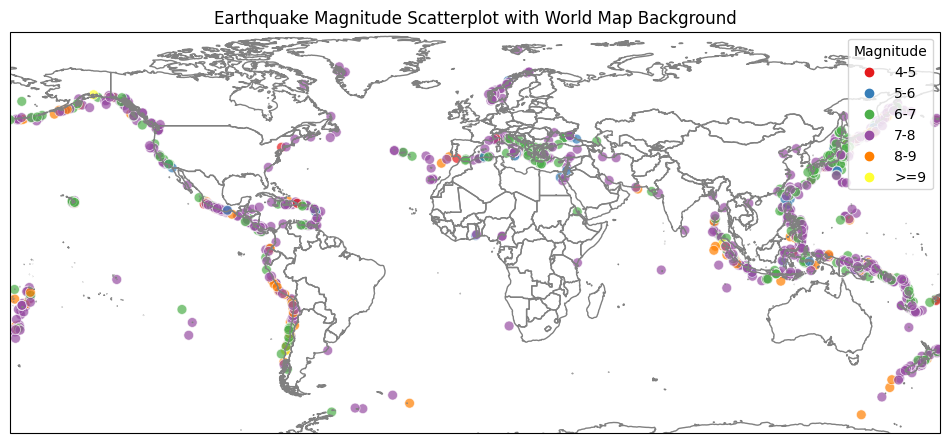

In [ ]:
# Create custom bins for earthquake magnitudes
bins = [4, 5, 6, 7, 8, 9, 10]  # Adjust the bin edges as needed
labels = ['4-5', '5-6', '6-7', '7-8', '8-9', '>=9']

# Add a new column to the DataFrame indicating the magnitude bin
data['Eq Magnitude Bin'] = pd.cut(data['Eq Magnitude'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))

# use cartopy for the world map background
ax = plt.axes(projection=ccrs.PlateCarree())

# add world borders as a background
ax.add_feature(NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none', edgecolor='gray'))

# scatterplot using Seaborn with the custom color palette ("Set1")
scatter = sns.scatterplot(x='Longitude', y='Latitude', hue='Eq Magnitude Bin', data=data, palette='Set1', s=50, alpha=0.7)

# customize the plot
plt.title('Earthquake Magnitude Scatterplot with World Map Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude', loc='upper right')

# show the plot
plt.show()

In [ ]:
# Folium map for tsunami validity
# Create a folium map centered around the mean of the coordinates
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=3)

# Define a function to map validity values to colors
def get_color_based_on_Validity(event):
    if event == 3:
        return 'green'
    elif event == 4:
        return 'red'

# Add markers for each data point with hue based on "Tsunami Validity"
for index, row in data.iterrows():
    event = row['Validity']
    hue_color = get_color_based_on_Validity(event)

    # Create a marker with the specified hue color
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Location']} - Validity: {event}",
        icon=folium.Icon(color=hue_color)
    ).add_to(my_map)

# Display the map
my_map

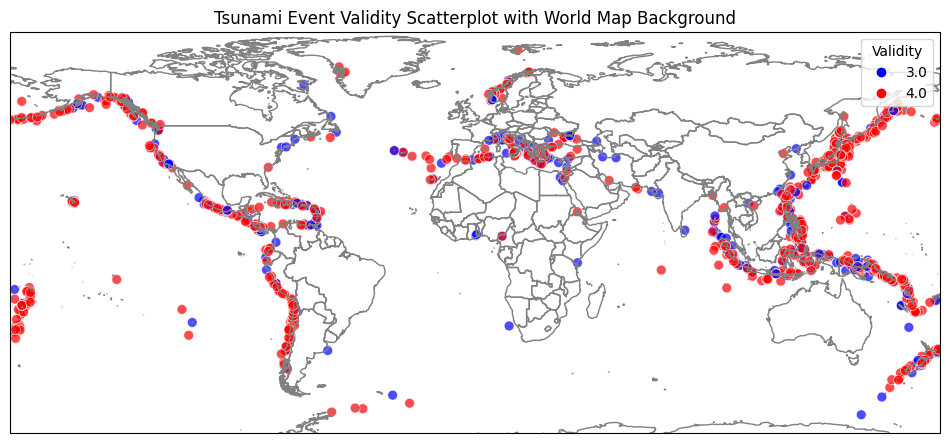

In [ ]:
# Plotting scatterplot for tsunami validity with world map bg
plt.figure(figsize=(12, 8))

# use cartopy for the world map background
ax = plt.axes(projection=ccrs.PlateCarree())

# add world borders as a background
ax.add_feature(NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none', edgecolor='gray'))

validity_colors = {
    (3): 'blue',    # Colors for magnitudes less than 5
    (4): '#FF0000',   # Color for magnitude 5
}
# Create a custom color map based on the defined ranges
custom_cmap_validity = sns.color_palette([validity_colors[key] for key in sorted(validity_colors.keys())])

# scatterplot using Seaborn
scatter = sns.scatterplot(x='Longitude', y='Latitude', hue='Validity', data=data, palette=custom_cmap_validity, s=50, alpha=0.7)

# customize the plot
plt.title('Tsunami Event Validity Scatterplot with World Map Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Validity', loc='upper right')

# # add gridlines
# ax.gridlines()

# show the plot
plt.show()

In [ ]:
# Folium map for tsunami magnitude
# Create a folium map centered around the mean of the coordinates
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=3)

# Define a function to map magnitude values to colors
def get_color_based_on_magnitudetsu(tsu):
    if tsu <= -1:
        return 'green'
    elif -1 < tsu < 1:
        return 'orange'
    elif tsu >= 1:
        return 'red'

# Add markers for each data point with hue based on "Tsunami Magnitude"
for index, row in data.iterrows():
    tsu = row['Tsm Magnitude (Iida)']
    hue_color = get_color_based_on_magnitudetsu(tsu)

    # Create a marker with the specified hue color
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Location']} - Tsunamimag: {tsu}",
        icon=folium.Icon(color=hue_color)
    ).add_to(my_map)

# Display the map
my_map

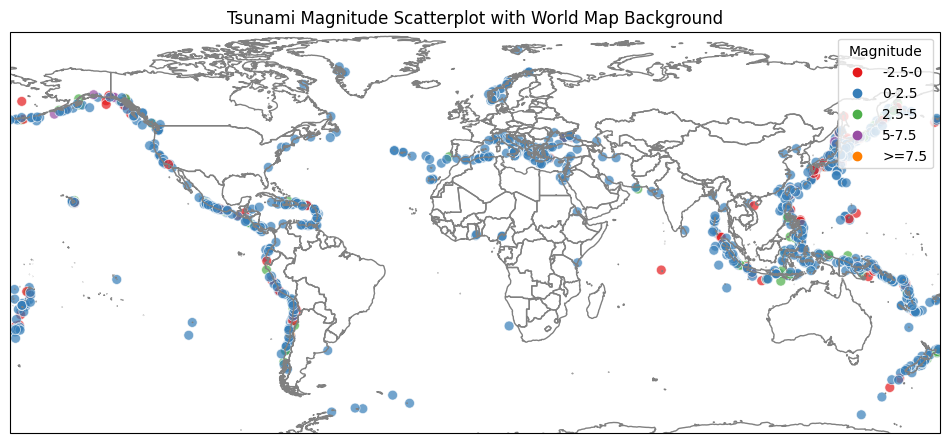

In [ ]:
# Create custom bins for tsunami magnitudes
bins = [-2.5, 0, 2.5, 5, 7.5, 10]  # Adjust the bin edges as needed
labels = ['-2.5-0', '0-2.5', '2.5-5', '5-7.5', '>=7.5']

# Add a new column to the DataFrame indicating the magnitude bin
data['Tsm Magnitude Bin'] = pd.cut(data['Tsm Magnitude (Iida)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 8))

# use cartopy for the world map background
ax = plt.axes(projection=ccrs.PlateCarree())

# add world borders as a background
ax.add_feature(NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m', facecolor='none', edgecolor='gray'))

# scatterplot using Seaborn with the custom color palette ("Set1")
scatter = sns.scatterplot(x='Longitude', y='Latitude', hue='Tsm Magnitude Bin', data=data, palette='Set1', s=50, alpha=0.7)

# customize the plot
plt.title('Tsunami Magnitude Scatterplot with World Map Background')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude', loc='upper right')

# show the plot
plt.show()

EDA

Text(0, 0.5, 'Number of Events')

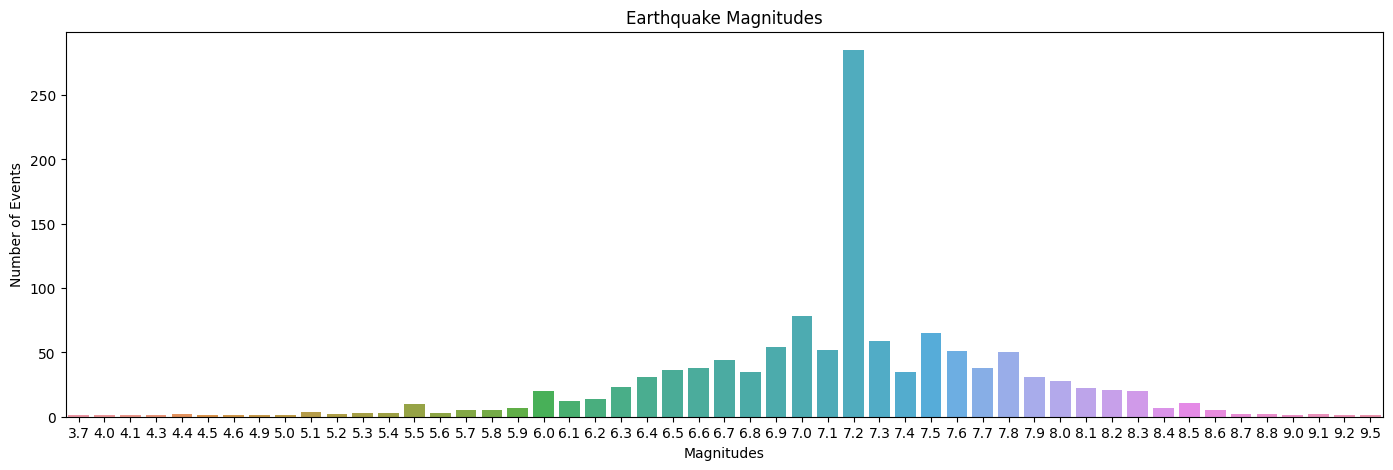

In [ ]:
# Displaying Earthquake Magnitude
# Most are scaled 7.2
plt.figure(figsize = (17,5))
sns.countplot(x = 'Eq Magnitude', data = data)
plt.title('Earthquake Magnitudes')
plt.xlabel('Magnitudes')
plt.ylabel('Number of Events')

<Axes: xlabel='Cause', ylabel='count'>

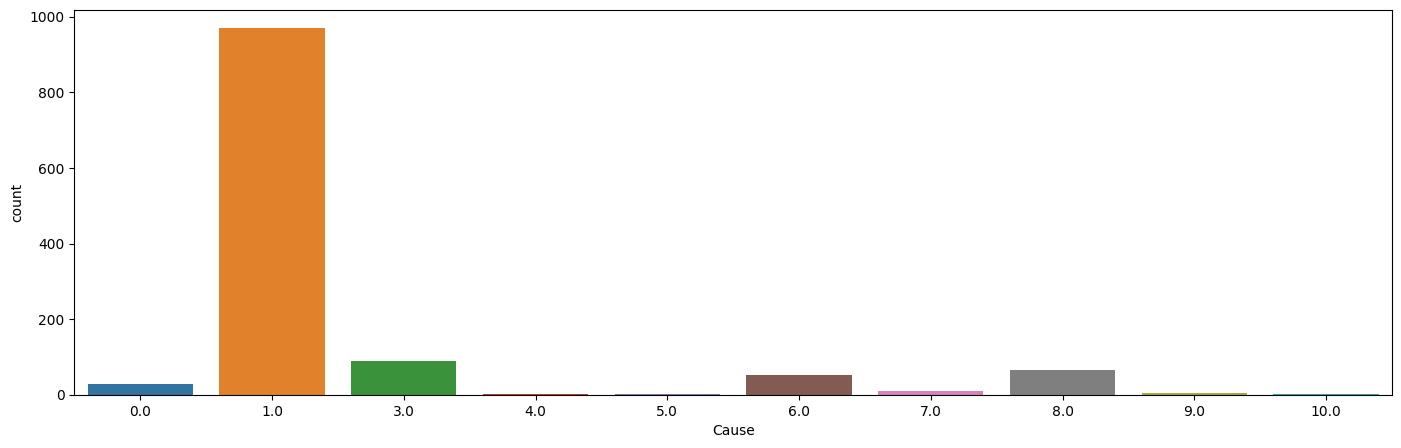

In [ ]:
# Displaying Tsunami Cause
# The majority is caused by earthquake (1.0)
plt.figure(figsize = (17,5))
sns.countplot(x = 'Cause', data = data)

Text(0, 0.5, 'Number of Events')

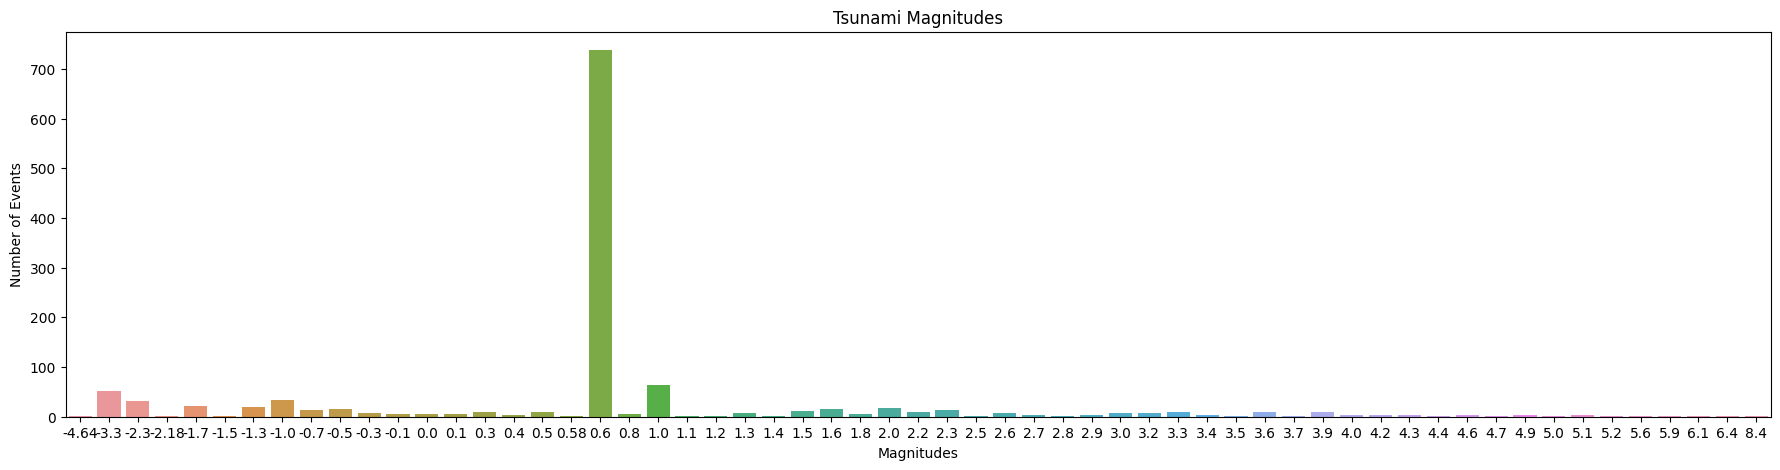

In [ ]:
# Displaying Tsunami Magnitude
# Most are scaled 0.6 Iida
plt.figure(figsize = (22,5))
sns.countplot(x = 'Tsm Magnitude (Iida)', data = data)
plt.title('Tsunami Magnitudes')
plt.xlabel('Magnitudes')
plt.ylabel('Number of Events')

<Figure size 1600x1000 with 0 Axes>

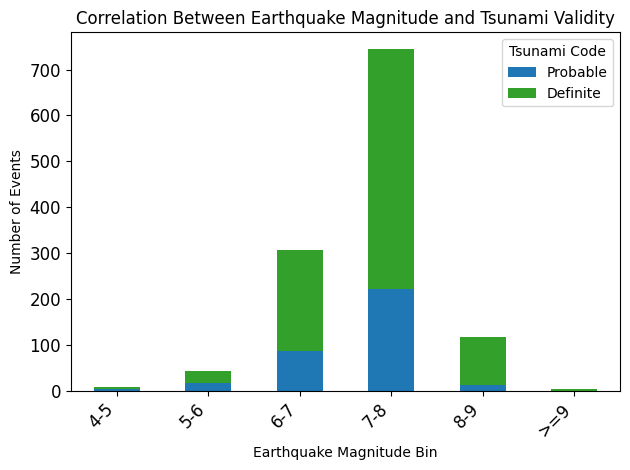

In [ ]:
# Barplot to show correlation between earthquake magnitude and validity
# Create a DataFrame for counting probable and definite earthquake for each magnitude bin
count_df = data.groupby(['Eq Magnitude Bin', 'Validity']).size().unstack().fillna(0)
count_df.columns = ['Probable', 'Definite']

# Plotting
plt.figure(figsize=(16, 10))  # Adjust figure size

# Bar plot
count_df.plot(kind='bar', stacked=True, color=['#1f78b4', '#33a02c'])

# Customize the plot
plt.title('Correlation Between Earthquake Magnitude and Tsunami Validity')
plt.xlabel('Earthquake Magnitude Bin')
plt.ylabel('Number of Events')
plt.legend(title='Tsunami Code', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

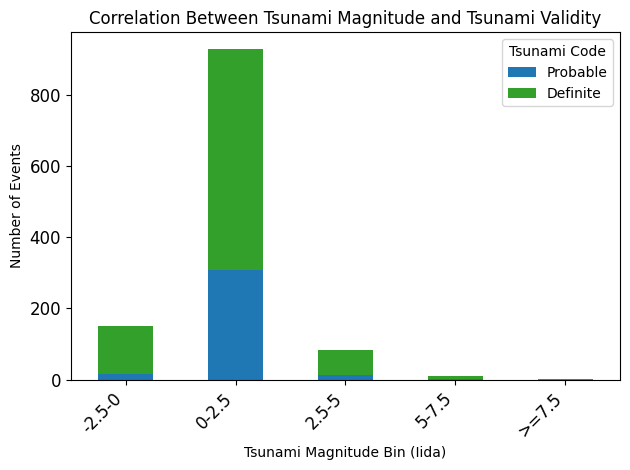

In [ ]:
# Barplot to show correlation between tsunami. magnitude and validity
# Create a DataFrame for counting probable and definite tsunamis for each magnitude bin
count_df = data.groupby(['Tsm Magnitude Bin', 'Validity']).size().unstack().fillna(0)
count_df.columns = ['Probable', 'Definite']

# Plotting
plt.figure(figsize=(16, 10))  # Adjust figure size

# Bar plot
count_df.plot(kind='bar', stacked=True, color=['#1f78b4', '#33a02c'])

# Customize the plot
plt.title('Correlation Between Tsunami Magnitude and Tsunami Validity')
plt.xlabel('Tsunami Magnitude Bin (Iida)')
plt.ylabel('Number of Events')
plt.legend(title='Tsunami Code', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1600x1000 with 0 Axes>

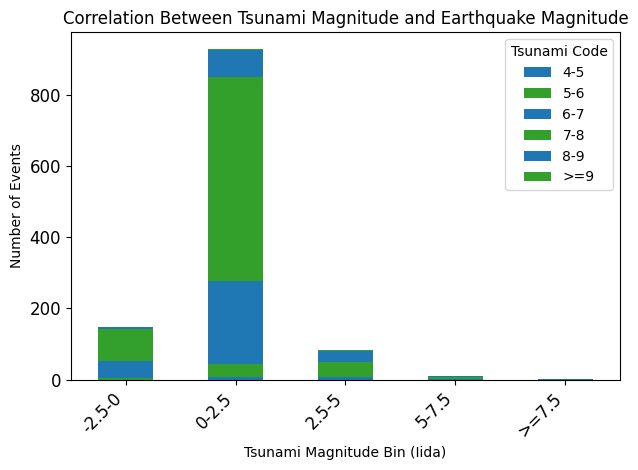

In [ ]:
# Barplot to show correlation between tsunami. magnitude and validity
# Create a DataFrame for counting probable and definite tsunamis for each magnitude bin
count_df = data.groupby(['Tsm Magnitude Bin', 'Eq Magnitude Bin']).size().unstack().fillna(0)
# count_df.columns = ['Probable', 'Definite']

# Plotting
plt.figure(figsize=(16, 10))  # Adjust figure size

# Bar plot
count_df.plot(kind='bar', stacked=True, color=['#1f78b4', '#33a02c'])

# Customize the plot
plt.title('Correlation Between Tsunami Magnitude and Earthquake Magnitude')
plt.xlabel('Tsunami Magnitude Bin (Iida)')
plt.ylabel('Number of Events')
plt.legend(title='Tsunami Code', loc='upper right')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'TOP 20 COUNTRIES AT RISK OF EARTHQUAKE')

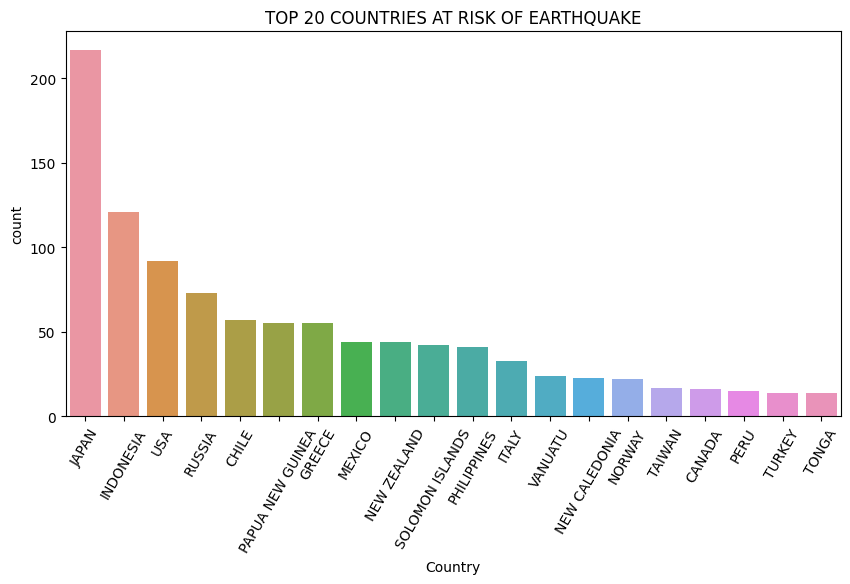

In [ ]:
# Displaying the top 20 earthquake-prone countries
order = data['Country'].value_counts().head(20).index
plt.figure(figsize = (10,5))
sns.countplot(x = 'Country', data = data, order = order)
plt.xticks(rotation = 60)
plt.title('TOP 20 COUNTRIES AT RISK OF EARTHQUAKE')

Text(0.5, 1.0, 'TOP 20 COUNTRIES WITH HIGHEST TSUNAMI OCCURANCE')

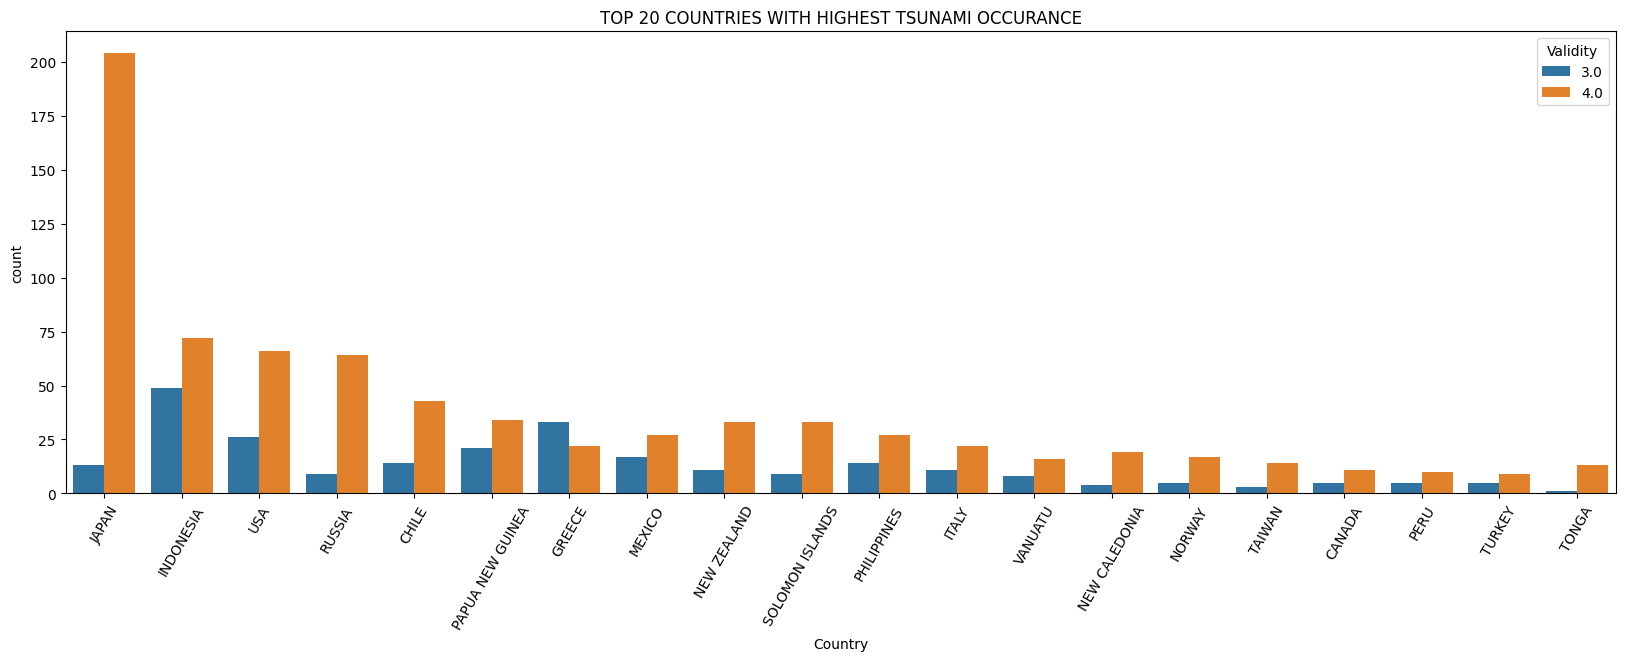

In [ ]:
# Displaying top 20 countries with the most tsunami occurance
order = data['Country'].value_counts().head(20).index
plt.figure(figsize = (20,6))
sns.countplot(x = 'Country', data = data,order = order, hue = 'Validity')
plt.xticks(rotation = 60)
plt.title('TOP 20 COUNTRIES WITH HIGHEST TSUNAMI OCCURANCE')

Text(0.5, 1.0, 'TSUNAMI CAUSE CODE DISTRIBUTION FOR TOP 5 TSUNAMI-PRONE COUNTRIES')

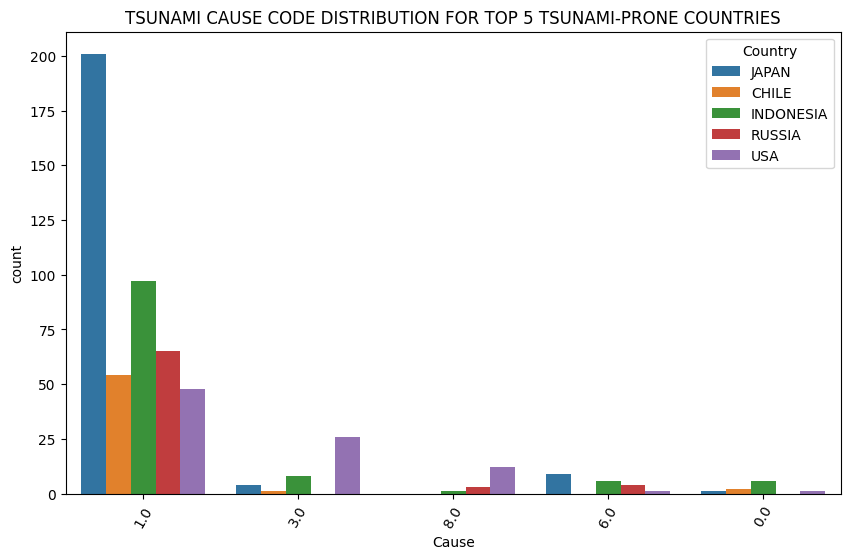

In [ ]:
# Displaying the cause of tsunami of the top 5 tsunami prone countries
# Topped by 1.0 which is earthquake
order = data['Cause'].value_counts().head(5).index
top_countries = data['Country'].value_counts().head(5).index
filtered_data = data[data['Country'].isin(top_countries)]
plt.figure(figsize=(10,6))
sns.countplot(x = 'Cause', data = filtered_data, order = order, hue = 'Country')
plt.xticks(rotation = 60)
plt.title('TSUNAMI CAUSE CODE DISTRIBUTION FOR TOP 5 TSUNAMI-PRONE COUNTRIES')

Text(0.5, 1.0, 'TOP 20 EARTHQUAKE-PRONE COUNTRIES WITH TSUNAMI RISK')

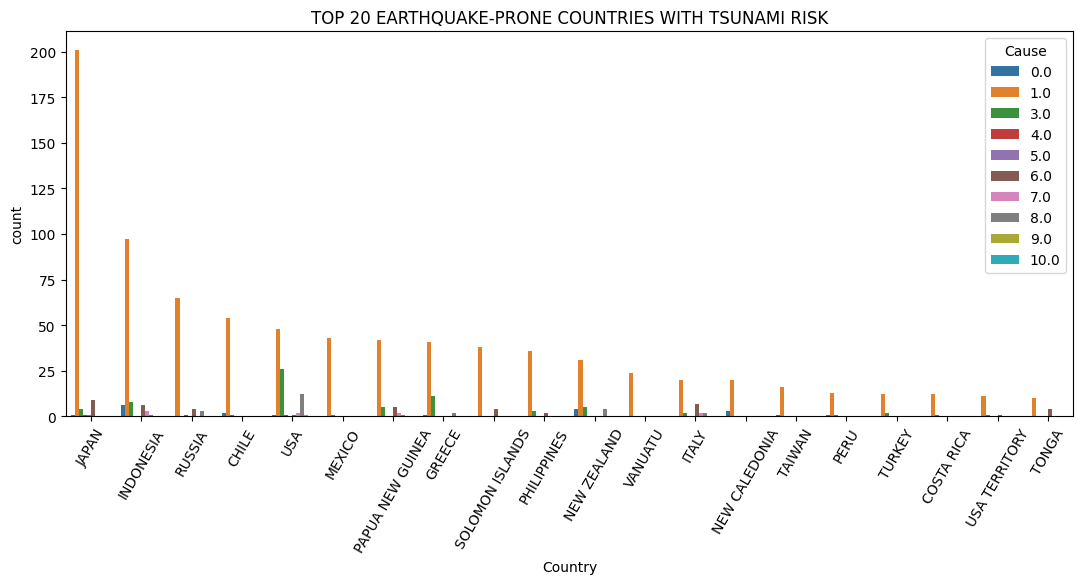

In [ ]:
# Displaying the top 20 countries that suffered from the tsunami that is caused by earthquake
# Most of the tsunamis are caused by earthquake (the orange bar is higher than any other colored bar)
filtered = data[data['Cause'] == 1.0]
order = filtered['Country'].value_counts().head(20).index
plt.figure(figsize = (13,5))
sns.countplot(x = 'Country', data = data, order = order, hue = 'Cause')
plt.xticks(rotation = 60)
plt.title('TOP 20 EARTHQUAKE-PRONE COUNTRIES WITH TSUNAMI RISK')

Text(0.5, 1.0, 'TOP 20 EARTHQUAKE-PRONE LOCATIONS WITH TSUNAMI RISK')

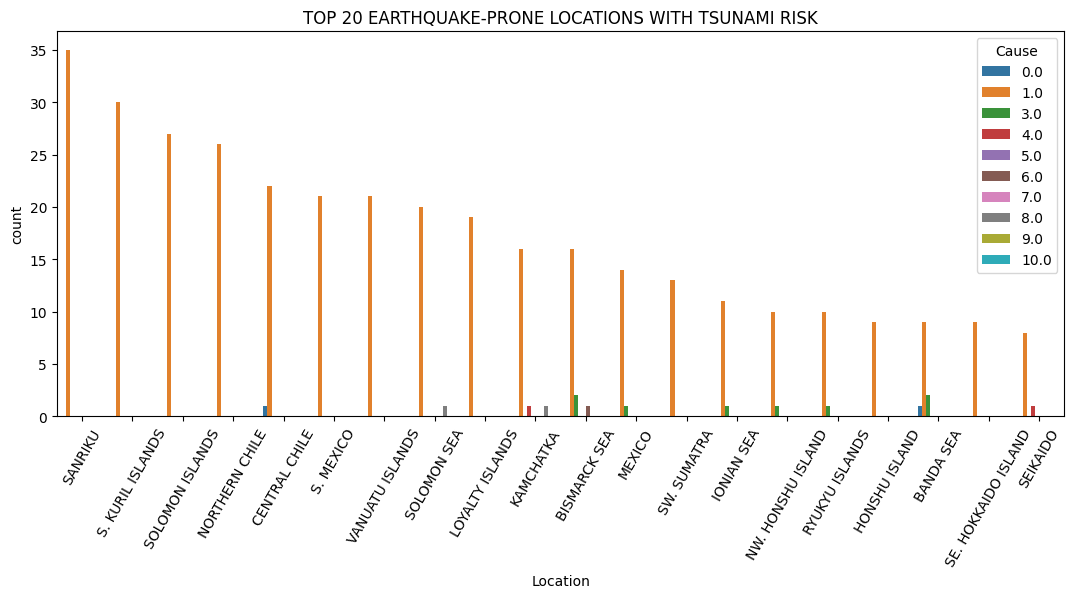

In [ ]:
# Displaying the top 20 locations that suffered from the tsunami that is caused by earthquake
filtered = data[data['Cause'] == 1.0]
order = filtered['Location'].value_counts().head(20).index
plt.figure(figsize = (13,5))
sns.countplot(x = 'Location', data = data, order = order, hue = 'Cause')
plt.xticks(rotation = 60)
plt.title('TOP 20 EARTHQUAKE-PRONE LOCATIONS WITH TSUNAMI RISK')

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN JAPAN PER YEAR')

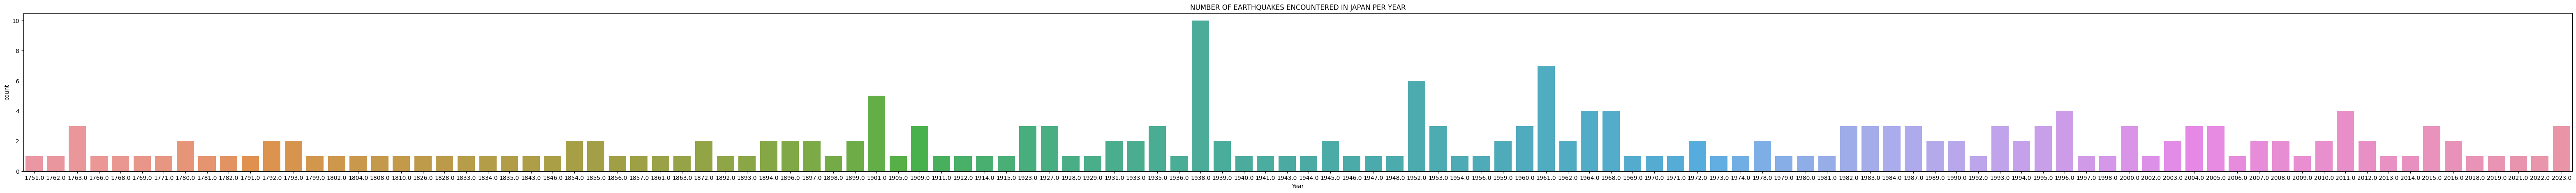

In [ ]:
# Displaying the number of tsunamis that happened in Japan each year
# Japan has at least one tsunami happening every year and the most in 1938
Japan = data[data['Country'] == 'JAPAN']
plt.figure(figsize = (80,5))
sns.countplot(x = 'Year',data = Japan)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN JAPAN PER YEAR')

Text(0.5, 1.0, 'TOP 10 YEARS WITH MOST NUMBER OF TSUNAMIS')

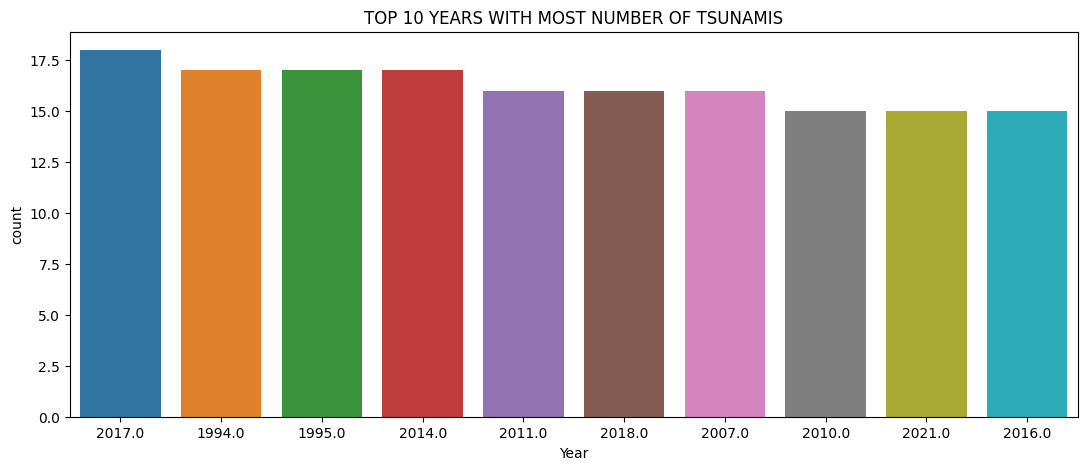

In [ ]:
# Displaying the top 10 years with most number of tsunamis
# Data is from year 1750-2023
plt.figure(figsize = (13,5))
order = data['Year'].value_counts().head(10).index
sns.countplot(x = 'Year', data = data, order = order)
plt.title('TOP 10 YEARS WITH MOST NUMBER OF TSUNAMIS')

Text(0.5, 1.0, 'TOP 5 MAXIMUM WATER HEIGHT (M)')

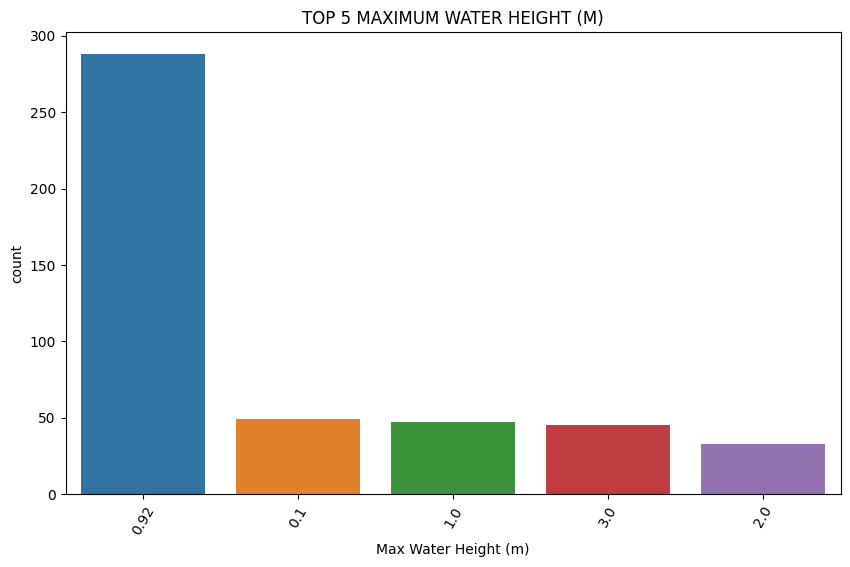

In [ ]:
# Displaying top 5 highest water height (m)
order = data['Max Water Height (m)'].value_counts().head(5).index
plt.figure(figsize=(10,6))
sns.countplot(x = 'Max Water Height (m)', data = data, order = order)
plt.xticks(rotation = 60)
plt.title('TOP 5 MAXIMUM WATER HEIGHT (M)')

Text(0.5, 1.0, 'CORRELATION BETWEEN EARTHQUAKE MAGNITUDE AND TSUNAMI MAGNITUDE')

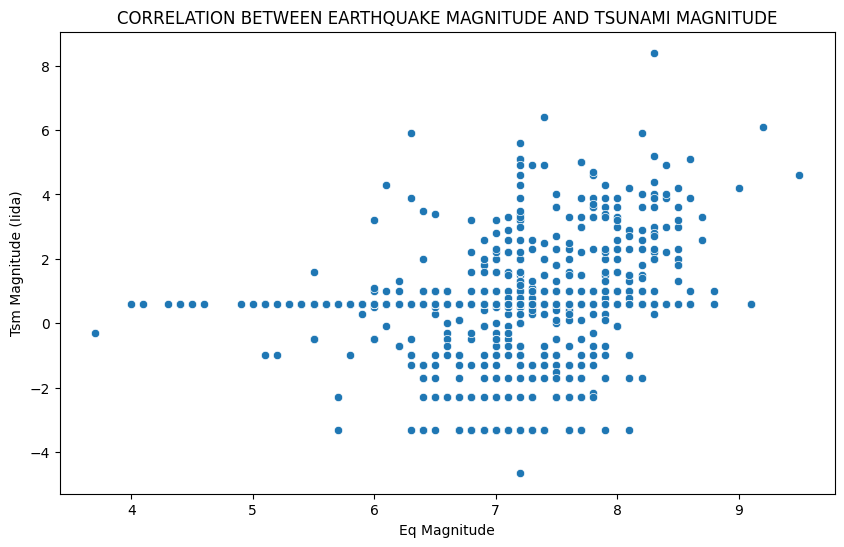

In [ ]:
# Displaying the correlation between eq magnitude and tsm magnitude
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Eq Magnitude', y = 'Tsm Magnitude (Iida)', data = data)
plt.title('CORRELATION BETWEEN EARTHQUAKE MAGNITUDE AND TSUNAMI MAGNITUDE')

In [ ]:
# Create a binary column indicating whether a tsunami is likely to occur
data['Tsunami'] = (data['Validity'] == 4.0).astype(int)

# Separate majority and minority classes
majority_class = 1  # Assuming 1 is the majority class
minority_class = 0

# Upsample the minority class
majority = data[data['Tsunami'] == majority_class]
minority = data[data['Tsunami'] == minority_class]

# Downsample the majority class to match the minority class support
majority_downsampled = resample(majority, replace=False, n_samples=int(1.8*len(minority)), random_state=42)

# Combine the downsampled majority class with the minority class
downsampled = pd.concat([majority_downsampled, minority])

In [ ]:
# Encode Country
ECountry = LabelEncoder()
data['ECountry'] = ECountry.fit_transform(data['Country'])

# Print the mapping dictionaries for 'Country'
country_mapping_dict = dict(zip(data['ECountry'].unique(), ECountry.inverse_transform(data['ECountry'].unique())))
sorted_country_mapping_dict = sorted(country_mapping_dict.items(), key=lambda x: x[0])

print("Encoded_Country Mapping:")
for key, value in sorted_country_mapping_dict:
    print(f"{key} = {value}")

Encoded_Country Mapping:
0 = ALBANIA
1 = ALGERIA
2 = ANTARCTICA
3 = ARGENTINA
4 = ATLANTIC OCEAN
5 = AUSTRALIA
6 = BANGLADESH
7 = BULGARIA
8 = CAMEROON
9 = CANADA
10 = CHILE
11 = CHINA
12 = COLOMBIA
13 = COSTA RICA
14 = CROATIA
15 = CUBA
16 = CYPRUS
17 = DOMINICAN REPUBLIC
18 = ECUADOR
19 = EGYPT
20 = EL SALVADOR
21 = ERITREA
22 = FIJI
23 = FRANCE
24 = FRENCH POLYNESIA
25 = GHANA
26 = GREECE
27 = GREENLAND
28 = GRENADA
29 = GUADELOUPE (FRENCH TERRITORY)
30 = GUATEMALA
31 = HAITI
32 = HONDURAS
33 = INDIA
34 = INDONESIA
35 = IRAN
36 = ISRAEL
37 = ITALY
38 = JAMAICA
39 = JAPAN
40 = JORDAN
41 = KENYA
42 = KERMADEC ISLANDS
43 = MARTINIQUE (FRENCH TERRITORY)
44 = MEXICO
45 = MONTENEGRO
46 = MONTSERRAT
47 = MOROCCO
48 = MYANMAR (BURMA)
49 = NEW CALEDONIA
50 = NEW ZEALAND
51 = NICARAGUA
52 = NORWAY
53 = PAKISTAN
54 = PANAMA
55 = PAPUA NEW GUINEA
56 = PERU
57 = PHILIPPINES
58 = PORTUGAL
59 = RUSSIA
60 = SAINT VINCENT AND THE GRENADINES
61 = SAMOA
62 = SOLOMON ISLANDS
63 = SOUTH AFRICA
64 = SPAI

In [ ]:
# Encode Location Name
ELocation = LabelEncoder()
data['ELocation'] = ELocation.fit_transform(data['Location'])

# Print the mapping dictionaries for 'Location'
location_mapping_dict = dict(zip(data['ELocation'].unique(), ELocation.inverse_transform(data['ELocation'].unique())))
sorted_location_mapping_dict = sorted(location_mapping_dict.items(), key=lambda x: x[0])

print("Encoded_Location Mapping:")
for key, value in sorted_location_mapping_dict:
    print(f"{key} = {value}")

Encoded_Location Mapping:
0 = ACAPULCO
1 = ADRIATIC SEA
2 = AEGEAN SEA
3 = ALASKA PENINSULA, AK
4 = ALBANIAN COASTS
5 = ALBORAN SEA
6 = ALEUTIAN ISLANDS, AK
7 = ALEXANDRIA
8 = ALGIERS
9 = ALIKA, HAWAII
10 = AMAKUSA SEA
11 = AMBON ISLAND
12 = AMORGOS ISLAND, AEGEAN ISLANDS
13 = ANDAMAN ISLANDS
14 = ANDAMAN ISLANDS, INDIA
15 = ANDAMAN SEA, E. COAST INDIA
16 = ANDREANOF ISLANDS, AK
17 = ANEGAWA, JAPAN
18 = ANSE-A-VEAU
19 = AOSHAN
20 = ARGOLIKOS GULF
21 = ASIA MINOR
22 = ATHENS-EASTERN GULF OF CORINTH
23 = ATKA, ALEUTIAN ISLANDS, AK
24 = AUCKLAND ISLANDS
25 = AWU VOLCANO, SANGIHE ISLAND
26 = AZORES
27 = AZORES GIBRALTAR FRACTURE ZONE
28 = AZUA  DE COMPOSTELA
29 = BALI SEA
30 = BALLENY ISLANDS
31 = BANDA SEA
32 = BASSE-TERRE, LES SAINTES
33 = BAY OF BENGAL: W OF CAR NICOBAR IS
34 = BAY OF HONDURAS
35 = BAY OF KOTOR
36 = BAY OF VLORE
37 = BENGKULU, SUMATRA
38 = BERING ISLAND
39 = BERING SEA, AK
40 = BISMARCK SEA
41 = BLACK SEA
42 = BLACKLEAD ISLAND, CUMBERLAND SOUND
43 = BOCAS DEL TORO
44 = 

In [ ]:
# Features
columns_to_drop = ['Tsunami', 'Validity', 'Country', 'Location', 'Tsm Magnitude Bin', 'Eq Magnitude Bin']
x = downsampled.drop(columns=columns_to_drop, axis=1)
# Target variable
y = downsampled['Tsunami']

In [ ]:
# Standardize the features
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns)

# # Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
# Showing the correlation coefficient between eq magnitude and tsm magnitude
# The result of 0.22 shows a weak correlation between both of them
correlation_coefficient = data['Eq Magnitude'].corr(data['Tsm Magnitude (Iida)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.22108045364135848


<Axes: xlabel='Tsunami', ylabel='count'>

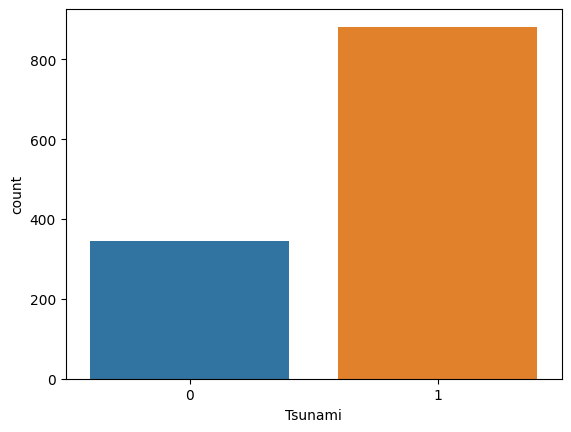

In [ ]:
# Displaying the comparison of tsunami values with 0 = probable tsunami and 1 = definite tsunami
sns.countplot(x = y, data = data)

In [ ]:
data.head()

Year  Month   Day  Validity  Cause  Eq Magnitude             Country  \
0  1751.0    5.0  20.0       4.0    3.0           6.6               JAPAN   
1  1751.0    5.0  25.0       4.0    1.0           8.5               CHILE   
2  1751.0   10.0  18.0       3.0    1.0           7.3  DOMINICAN REPUBLIC   
3  1754.0    8.0  18.0       3.0    1.0           6.5           INDONESIA   
4  1754.0    9.0   1.0       3.0    1.0           7.2              MEXICO   

              Location  Latitude  Longitude  Max Water Height (m)  \
0    NW. HONSHU ISLAND      37.2      138.1                  0.92   
1        CENTRAL CHILE     -37.0      -73.0                  3.50   
2  AZUA  DE COMPOSTELA      18.5      -70.7                  0.92   
3            BANDA SEA      -3.5      128.5                  0.92   
4            S. MEXICO      16.8      -99.2                  4.00   

   Tsm Magnitude (Iida) Eq Magnitude Bin Tsm Magnitude Bin  Tsunami  ECountry  \
0                   1.0              6-7             0-2.5        1        39   
1                   1.8              8-9             0-2.5        1        10   
2                   0.6              7-8             0-2.5        0        17   
3                   0.6              6-7             0-2.5        0        34   
4                   2.0              7-8             0-2.5        0        44   

   ELocation  
0        294  
1         62  
2         28  
3         31  
4        366

CLASSIFICATION REPORT (ACCURACY, PRECISION, RECALL, F1-SCORE)

In [ ]:
# Model : SVM
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_scores = svm_model.decision_function(x_test)
# Set a new threshold (can be adjust as needed)
new_threshold = 0.2
# Adjust predictions based on the new threshold
y_pred_adjusted_svm = (y_scores > new_threshold).astype(int)
print("Model: Support Vector Machine")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_svm))

Model: Support Vector Machine
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        83
           1       0.86      0.84      0.85       158

    accuracy                           0.80       241
   macro avg       0.78      0.79      0.79       241
weighted avg       0.81      0.80      0.81       241



In [ ]:
# Model : RFC
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_scores_rfc = rfc_model.predict_proba(x_test)[:, 1]
new_threshold_rfc = 0.4
y_pred_adjusted_rfc = (y_scores_rfc > new_threshold_rfc).astype(int)
print("Model: Random Forest Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_rfc))

Model: Random Forest Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        83
           1       0.84      0.93      0.88       158

    accuracy                           0.83       241
   macro avg       0.83      0.79      0.80       241
weighted avg       0.83      0.83      0.83       241



In [ ]:
# Model : DTC
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)
y_scores_dtc = dtc_model.predict_proba(x_test)[:, 1]
new_threshold_dtc = 0.5
y_pred_adjusted_dtc = (y_scores_dtc > new_threshold_dtc).astype(int)
print("Model: Decision Tree Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_dtc))

Model: Decision Tree Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        83
           1       0.81      0.76      0.78       158

    accuracy                           0.73       241
   macro avg       0.70      0.71      0.70       241
weighted avg       0.74      0.73      0.73       241



In [ ]:
# Model : XGB
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)
y_scores_xgb = xgb_model.predict_proba(x_test)[:, 1]
new_threshold_xgb = 0.2
y_pred_adjusted_xgb = (y_scores_xgb > new_threshold_xgb).astype(int)
print("Model: XGBoost")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_xgb))

Model: XGBoost
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.67      0.74        83
           1       0.84      0.92      0.88       158

    accuracy                           0.84       241
   macro avg       0.83      0.80      0.81       241
weighted avg       0.84      0.84      0.83       241



In [ ]:
# Model : GBC
gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)
y_scores_gbc = gbc_model.predict_proba(x_test)[:, 1]
new_threshold_gbc = 0.3
y_pred_adjusted_gbc = (y_scores_gbc > new_threshold_gbc).astype(int)
print("Model: Gradient Boosting Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_gbc))

Model: Gradient Boosting Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.65      0.73        83
           1       0.84      0.93      0.88       158

    accuracy                           0.83       241
   macro avg       0.83      0.79      0.80       241
weighted avg       0.83      0.83      0.83       241



In [ ]:
# Model : LR
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_scores_lr = lr_model.decision_function(x_test)
new_threshold_lr = 0.2
y_pred_adjusted_lr = (y_scores_lr > new_threshold_lr).astype(int)
print("Model: Logistic Regression")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_lr))

Model: Logistic Regression
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        83
           1       0.80      0.83      0.82       158

    accuracy                           0.76       241
   macro avg       0.73      0.72      0.72       241
weighted avg       0.75      0.76      0.75       241



BEST HYPERPARAMETER

In [ ]:
# Model: SVM
svm_model = SVC()
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(x_train,y_train)
best_params_svm = grid_svm.best_params_
print("Best Hyperparameters for Support Vector Machine:", best_params_svm)

Best Hyperparameters for Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Model: Random Forest Classifier
rfc_model = RandomForestClassifier()
param_grid_rfc = {
    'n_estimators': [150, 200],
    'max_depth': [10, 50],
    'min_samples_split': [2, 8],
    'min_samples_leaf': [1, 3]
}

grid_rfc = GridSearchCV(rfc_model, param_grid_rfc, cv=5, scoring='accuracy')
grid_rfc.fit(x_train, y_train)
best_params_rfc = grid_rfc.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rfc)

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Model: Decision Tree Classifier
dtc_model = DecisionTreeClassifier()
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 3]
}

grid_dtc = GridSearchCV(dtc_model, param_grid_dtc, cv=5, scoring='accuracy')
grid_dtc.fit(x_train, y_train)
best_params_dtc = grid_dtc.best_params_
print("Best Hyperparameters for Decision Tree Classifier:", best_params_dtc)

Best Hyperparameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'splitter': 'best'}


In [ ]:
# Model: XGBoost Classifier
xgb_model = xgb.XGBClassifier()
param_grid_xgb = {
    'learning_rate': [0.2],
    'n_estimators': [100, 120],
    'max_depth': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8],
    'gamma': [1, 5]
}

grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(x_train, y_train)
best_params_xgb = grid_xgb.best_params_
print("Best Hyperparameters for XGBoost Classifier:", best_params_xgb)

Best Hyperparameters for XGBoost Classifier: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [ ]:
# Model: Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
param_grid_gbc = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_gbc = GridSearchCV(gbc_model, param_grid_gbc, cv=5, scoring='accuracy')
grid_gbc.fit(x_train, y_train)
best_params_gbc = grid_gbc.best_params_
print("Best Hyperparameters for Gradient Boosting Classifier:", best_params_gbc)

Best Hyperparameters for Gradient Boosting Classifier: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}


In [ ]:
# Model: Logistic Regression
lr_model = LogisticRegression()
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [200, 300, 400]
}

grid_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(x_train, y_train)
best_params_lr = grid_lr.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params_lr)

Best Hyperparameters for Logistic Regression: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}


RESULTS OF USING BEST PARAMETERS

In [ ]:
# Model: SVM
best_params_svm = {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
best_model_svm = SVC(**best_params_svm)
best_model_svm.fit(x_train, y_train)
y_scores_svm = best_model_svm.decision_function(x_test)
new_threshold_svm = 0.2
y_pred_adjusted_svm = (y_scores_svm > new_threshold_svm).astype(int)
print("Model: Support Vector Machine")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_svm))

Model: Support Vector Machine
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        83
           1       0.86      0.84      0.85       158

    accuracy                           0.80       241
   macro avg       0.78      0.79      0.79       241
weighted avg       0.81      0.80      0.81       241



In [ ]:
# Model: RFC
best_params_rfc = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best_model_rfc = RandomForestClassifier(**best_params_rfc)
best_model_rfc.fit(x_train, y_train)
y_scores_rfc = best_model_rfc.predict_proba(x_test)[:, 1]
new_threshold_rfc = 0.5
y_pred_adjusted_rfc = (y_scores_rfc > new_threshold_rfc).astype(int)
print("Model: Random Forest Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_rfc))

Model: Random Forest Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        83
           1       0.88      0.90      0.89       158

    accuracy                           0.85       241
   macro avg       0.84      0.83      0.83       241
weighted avg       0.85      0.85      0.85       241



In [ ]:
# Model: DTC
best_params_dtc = {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'splitter': 'best'}
best_model_dtc = DecisionTreeClassifier(**best_params_dtc)
best_model_dtc.fit(x_train, y_train)
y_scores_dtc = best_model_dtc.predict_proba(x_test)[:, 1]
new_threshold_dtc = 0.2
y_pred_adjusted_dtc = (y_scores_dtc > new_threshold_dtc).astype(int)
print("Model: Decision Tree Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_dtc))

Model: Decision Tree Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.54      0.64        83
           1       0.79      0.92      0.85       158

    accuracy                           0.79       241
   macro avg       0.78      0.73      0.74       241
weighted avg       0.79      0.79      0.78       241



In [ ]:
# Model: XGB
best_params_xgb = {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
best_model_xgb = xgb.XGBClassifier(**best_params_xgb)
best_model_xgb.fit(x_train, y_train)
y_scores_xgb = best_model_xgb.predict_proba(x_test)[:, 1]
new_threshold_xgb = 0.4
y_pred_adjusted_xgb = (y_scores_xgb > new_threshold_xgb).astype(int)
print("Model: XGB Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_xgb))

Model: XGB Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.75      0.77        83
           1       0.87      0.91      0.89       158

    accuracy                           0.85       241
   macro avg       0.84      0.83      0.83       241
weighted avg       0.85      0.85      0.85       241



In [ ]:
# Model: GBC
best_params_gbc = {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50, 'subsample': 1.0}
best_model_gbc = GradientBoostingClassifier(**best_params_gbc)
best_model_gbc.fit(x_train, y_train)
y_scores_gbc = best_model_gbc.predict_proba(x_test)[:, 1]
new_threshold_gbc = 0.4
y_pred_adjusted_gbc = (y_scores_gbc > new_threshold_gbc).astype(int)
print("Model: Gradient Boosting Classifier")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_gbc))

Model: Gradient Boosting Classifier
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        83
           1       0.86      0.91      0.88       158

    accuracy                           0.84       241
   macro avg       0.83      0.81      0.82       241
weighted avg       0.84      0.84      0.84       241



In [ ]:
# Model: Logistic Regression
best_params_lr = {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
best_model_lr = LogisticRegression(**best_params_lr)
best_model_lr.fit(x_train, y_train)
y_scores_lr = best_model_lr.decision_function(x_test)
new_threshold_lr = 0.4
y_pred_adjusted_lr = (y_scores_lr > new_threshold_lr).astype(int)

print("Model: Logistic Regression")
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred_adjusted_lr))

Model: Logistic Regression
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.78      0.71        83
           1       0.87      0.78      0.82       158

    accuracy                           0.78       241
   macro avg       0.76      0.78      0.77       241
weighted avg       0.80      0.78      0.78       241



CONFUSION MATRIX

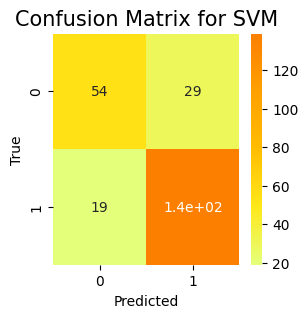

In [ ]:
# Model : SVM
plt.rcParams['figure.figsize'] = [3,3]
confusion_mat = confusion_matrix(y_test, best_model_svm.predict(x_test))
sns.heatmap(confusion_mat, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for SVM', fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

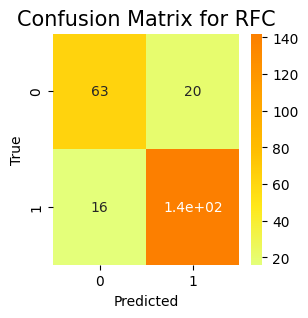

In [ ]:
# Model : RFC
plt.rcParams['figure.figsize'] = [3,3]
confusion_mat = confusion_matrix(y_test, best_model_rfc.predict(x_test))
sns.heatmap(confusion_mat, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for RFC', fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

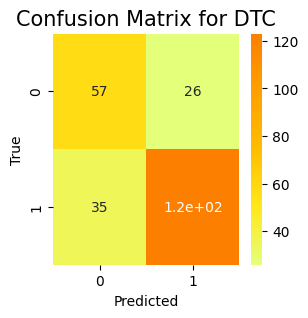

In [ ]:
# Model : DTC
plt.rcParams['figure.figsize'] = [3,3]
confusion_mat = confusion_matrix(y_test, best_model_dtc.predict(x_test))
sns.heatmap(confusion_mat, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for DTC', fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

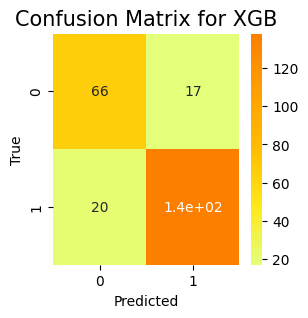

In [ ]:
# Model : XGB
plt.rcParams['figure.figsize'] = [3,3]
confusion_mat = confusion_matrix(y_test, best_model_xgb.predict(x_test))
sns.heatmap(confusion_mat, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for XGB', fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

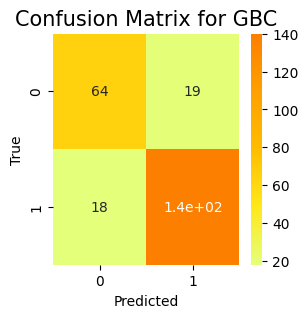

In [ ]:
# Model : GBC
plt.rcParams['figure.figsize'] = [3,3]
confusion_mat = confusion_matrix(y_test, best_model_gbc.predict(x_test))
sns.heatmap(confusion_mat, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for GBC', fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

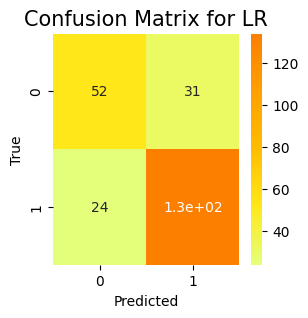

In [ ]:
# Model : LR
plt.rcParams['figure.figsize'] = [3,3]
confusion_mat = confusion_matrix(y_test, best_model_lr.predict(x_test))
sns.heatmap(confusion_mat, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for LR', fontsize=15)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

HEATMAP TO SHOW CORRELATION

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


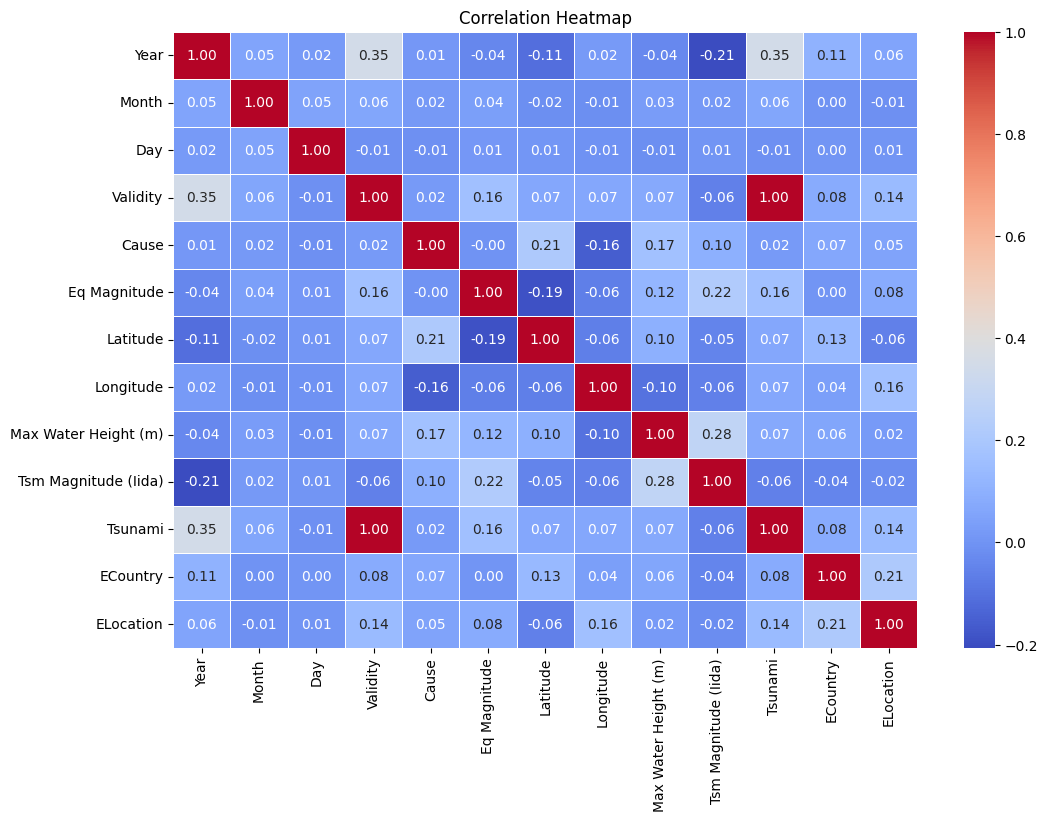

In [ ]:
# Heatmap to show correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

ROC AUC

In [ ]:
# Model : SVM
y_score_svm = best_model_svm.decision_function(x_test)
roc_auc_svm = roc_auc_score(y_test, y_score_svm)
print(f'ROC AUC for SVM: {roc_auc_svm:.2f}')

ROC AUC for SVM: 0.84


In [ ]:
# Model : RFC
y_score_rfc = best_model_rfc.predict_proba(x_test)[:, 1]
roc_auc_rfc = roc_auc_score(y_test, y_score_rfc)
print(f'ROC AUC for RFC: {roc_auc_rfc:.2f}')

ROC AUC for RFC: 0.88


In [ ]:
# Model : DTC
y_score_dtc = best_model_dtc.predict_proba(x_test)[:, 1]
roc_auc_dtc = roc_auc_score(y_test, y_score_dtc)
print(f'ROC AUC for DTC: {roc_auc_dtc:.2f}')

ROC AUC for DTC: 0.81


In [ ]:
# Model : XGB
y_score_xgb = best_model_xgb.predict_proba(x_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_score_xgb)
print(f'ROC AUC for XGB: {roc_auc_xgb:.2f}')

ROC AUC for XGB: 0.88


In [ ]:
# Model : GBC
y_score_gbc = best_model_gbc.predict_proba(x_test)[:, 1]
roc_auc_gbc = roc_auc_score(y_test, y_score_gbc)
print(f'ROC AUC for GBC: {roc_auc_gbc:.2f}')

ROC AUC for GBC: 0.88


In [ ]:
# Model : LR
y_score_lr = best_model_lr.decision_function(x_test)
roc_auc_lr = roc_auc_score(y_test, y_score_lr)
print(f'ROC AUC for LR: {roc_auc_lr:.2f}')

ROC AUC for LR: 0.83


ROC AUC Graph

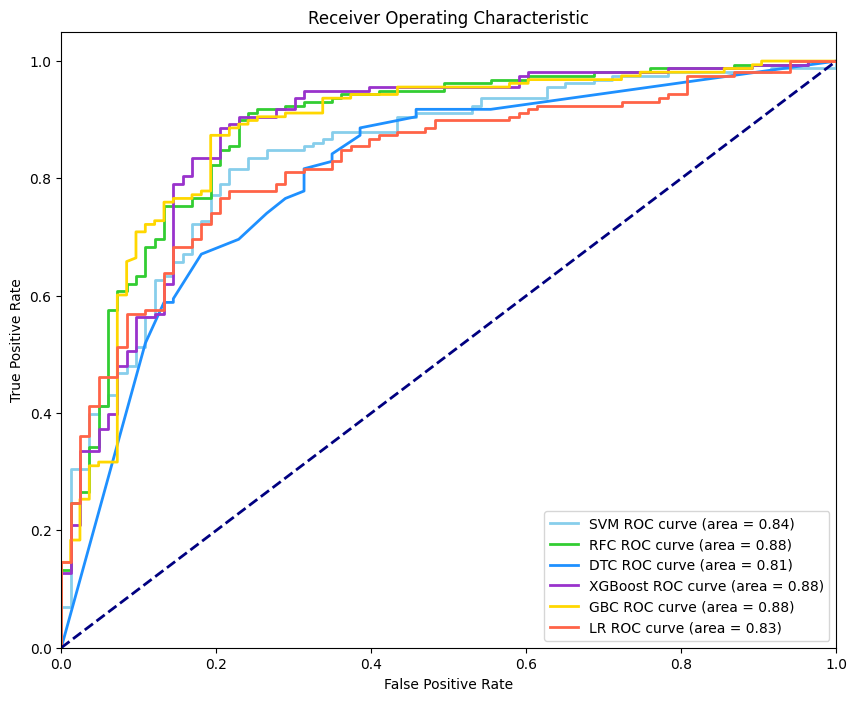

In [ ]:
# ROC AUC GRAPH FOR ALL MODELS

# Compute the y_score
y_score_svm = best_model_svm.decision_function(x_test)
y_score_rfc = best_model_rfc.predict_proba(x_test)[:, 1]
y_score_dtc = best_model_dtc.predict_proba(x_test)[:, 1]
y_score_xgb = best_model_xgb.predict_proba(x_test)[:, 1]
y_score_gbc = best_model_gbc.predict_proba(x_test)[:, 1]
y_score_lr = best_model_lr.decision_function(x_test)

# Compute ROC curve and ROC area
# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
# RFC
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_score_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
# DTC
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_score_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
# XGB
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
# GBC
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_score_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)
# LR
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, color='skyblue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})') # SVM
plt.plot(fpr_rfc, tpr_rfc, color='limegreen', lw=2, label=f'RFC ROC curve (area = {roc_auc_rfc:.2f})') # RFC
plt.plot(fpr_dtc, tpr_dtc, color='dodgerblue', lw=2, label=f'DTC ROC curve (area = {roc_auc_dtc:.2f})') # DTC
plt.plot(fpr_xgb, tpr_xgb, color='darkorchid', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})') # XGB
plt.plot(fpr_gbc, tpr_gbc, color='gold', lw=2, label=f'GBC ROC curve (area = {roc_auc_gbc:.2f})') # GBC
plt.plot(fpr_lr, tpr_lr, color='tomato', lw=2, label=f'LR ROC curve (area = {roc_auc_lr:.2f})') # LR

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

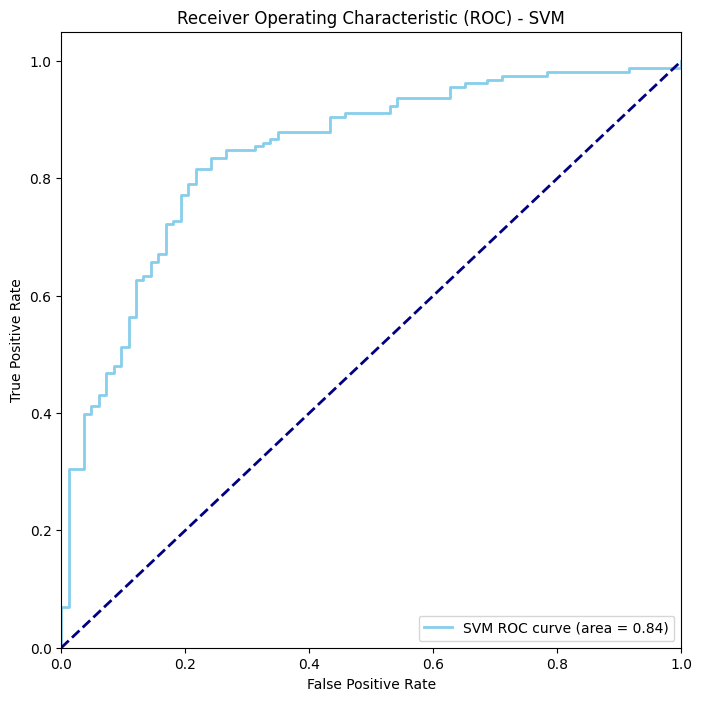

In [ ]:
# Model : SVM
y_score_svm = best_model_svm.decision_function(x_test)

# Compute ROC curve and ROC area
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='skyblue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.legend(loc="lower right")
plt.show()

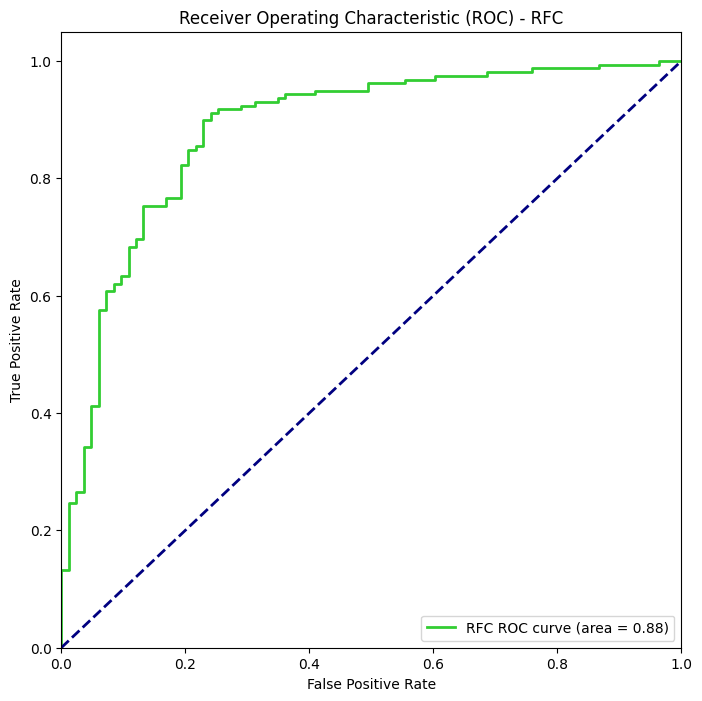

In [ ]:
# Model : RFC
y_score_rfc = best_model_rfc.predict_proba(x_test)[:, 1]  # Probability of class 1

# Compute ROC curve and ROC area
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_score_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_rfc, tpr_rfc, color='limegreen', lw=2, label=f'RFC ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - RFC')
plt.legend(loc="lower right")
plt.show()

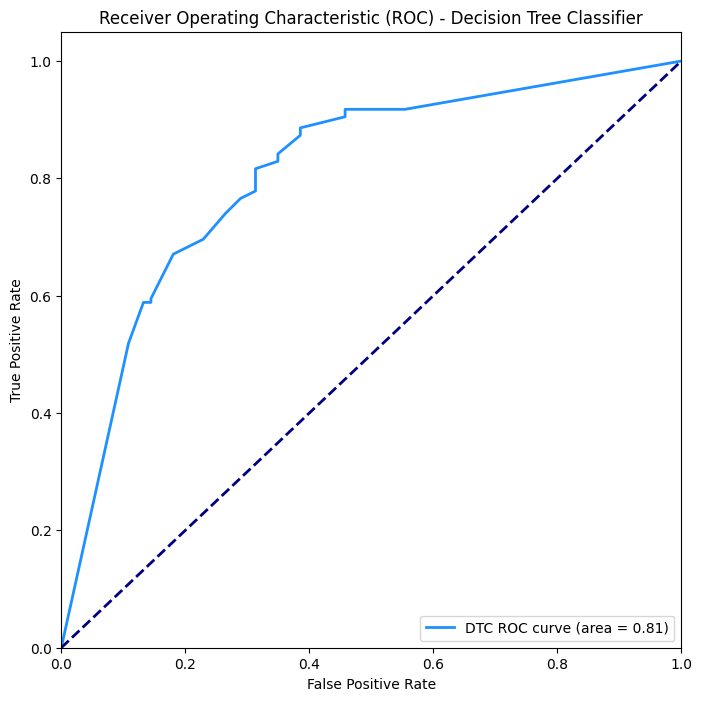

In [ ]:
# Model : DTC
y_score_dtc = best_model_dtc.predict_proba(x_test)[:, 1]  # Use predict_proba for decision tree classifiers

# Compute ROC curve and ROC area
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_score_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_dtc, tpr_dtc, color='dodgerblue', lw=2, label=f'DTC ROC curve (area = {roc_auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

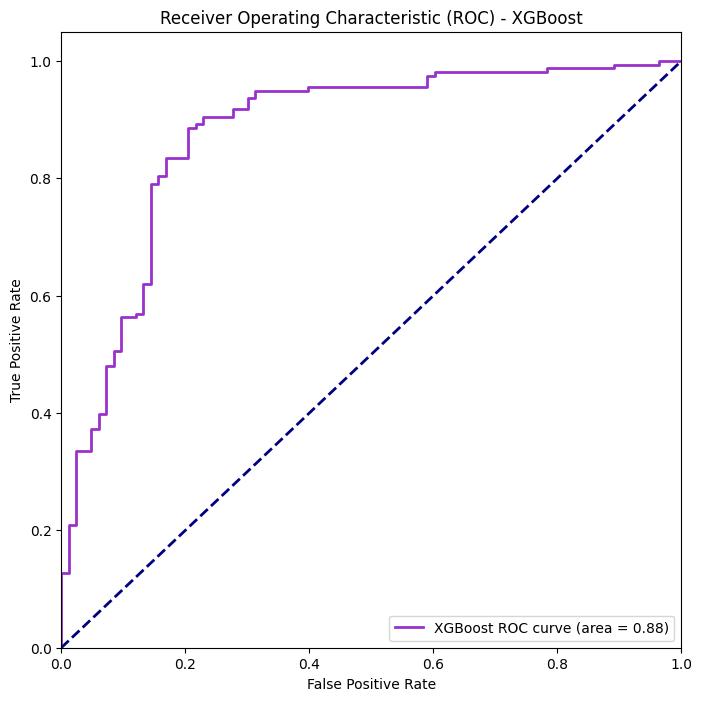

In [ ]:
# Model : XGB
y_score_xgb = best_model_xgb.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_xgb, tpr_xgb, color='darkorchid', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.show()

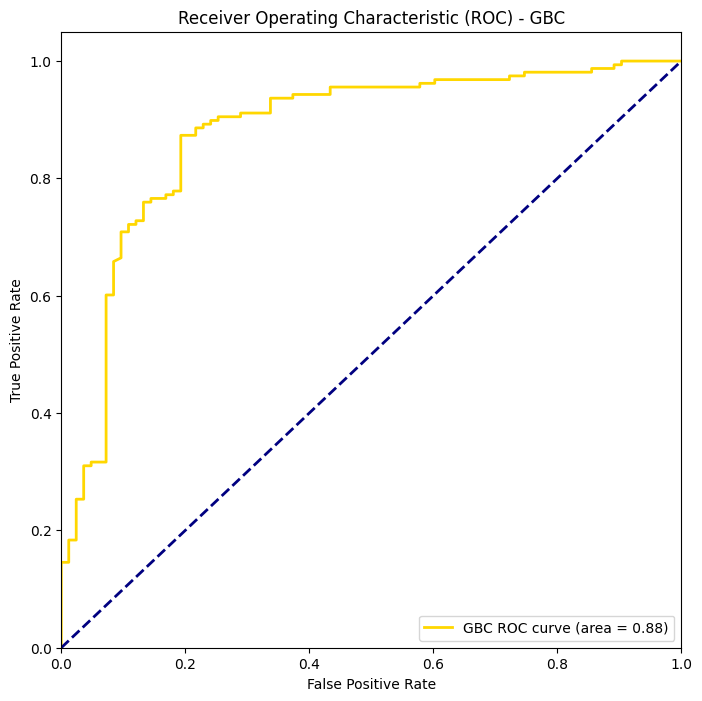

In [ ]:
# Model : GBC
y_score_gbc = best_model_gbc.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_score_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_gbc, tpr_gbc, color='gold', lw=2, label=f'GBC ROC curve (area = {roc_auc_gbc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - GBC')
plt.legend(loc="lower right")
plt.show()

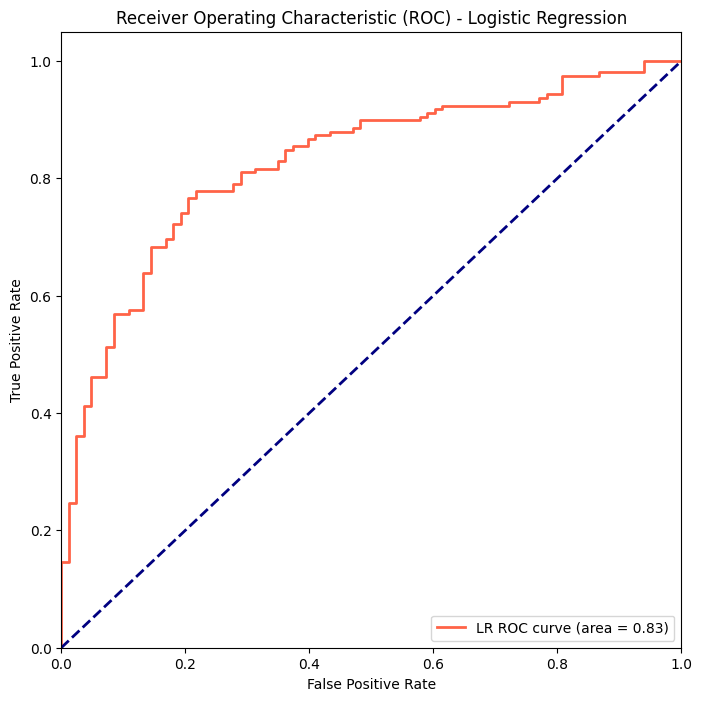

In [ ]:
# Model : LR
y_score_lr = best_model_lr.decision_function(x_test)

# Compute ROC curve and ROC area
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='tomato', lw=2, label=f'LR ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

SHAP Values

  0%|          | 0/100 [00:00<?, ?it/s]

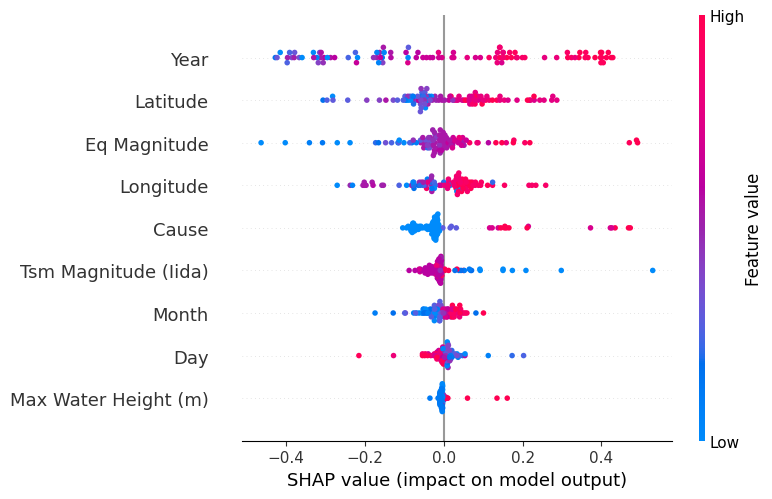

In [ ]:
# Model : SVM
best_model_svm.fit(x_train, y_train)
svm_predictor = lambda x: best_model_svm.decision_function(x)
explainer_svm = shap.KernelExplainer(best_model_svm.predict, x_train)
shap_values_svm = explainer_svm.shap_values(x_test.iloc[:100, :])
shap.summary_plot(shap_values_svm, features=x_test.iloc[:100, :], feature_names=x_test.columns)

[06:24:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


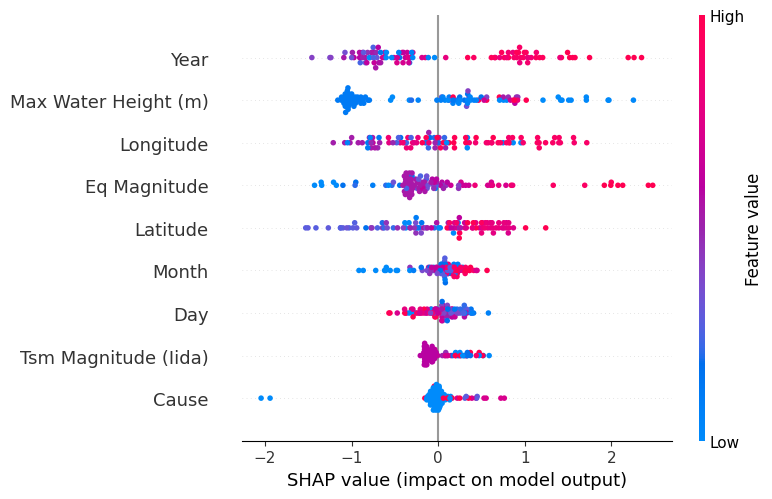

In [ ]:
# Model : XGB
best_model_xgb.fit(x_train, y_train)
xgb_predictor = lambda x: best_model_xgb.predict(x, output_margin=True)
explainer_xgb = shap.TreeExplainer(best_model_xgb)
shap_values_xgb = explainer_xgb.shap_values(x_test.iloc[:100, :])
shap.summary_plot(shap_values_xgb, features=x_test.iloc[:100, :], feature_names=x_test.columns)

FEATURE IMPORTANCE

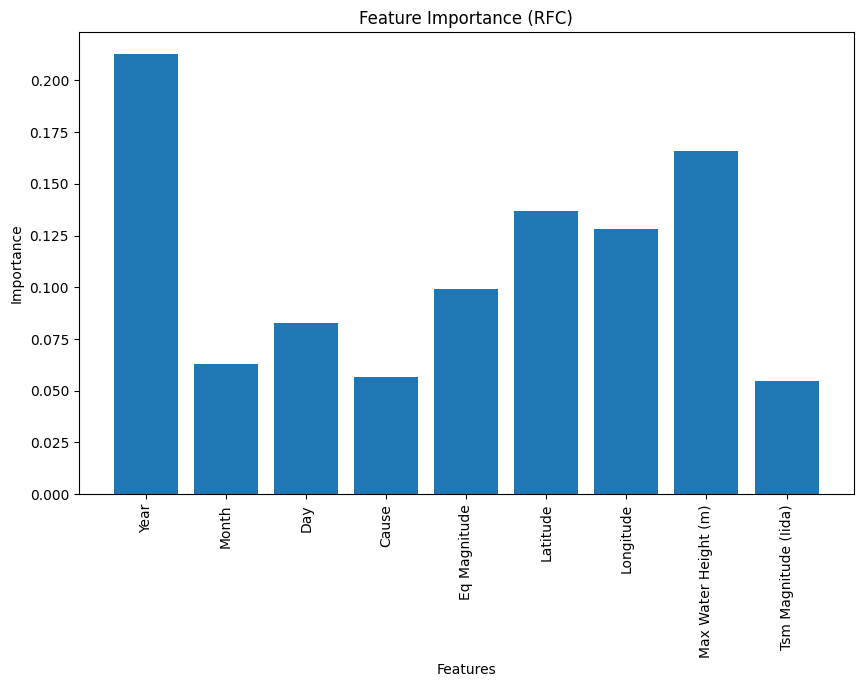

In [ ]:
# Model : RFC
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(x_train, y_train)

# Retrieving feature importance
feature_importance_rfc = rfc_model.feature_importances_

# Get feature names from your dataset
feature_names = x_train.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_rfc)), feature_importance_rfc, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (RFC)')
plt.xticks(rotation=90)
plt.show()

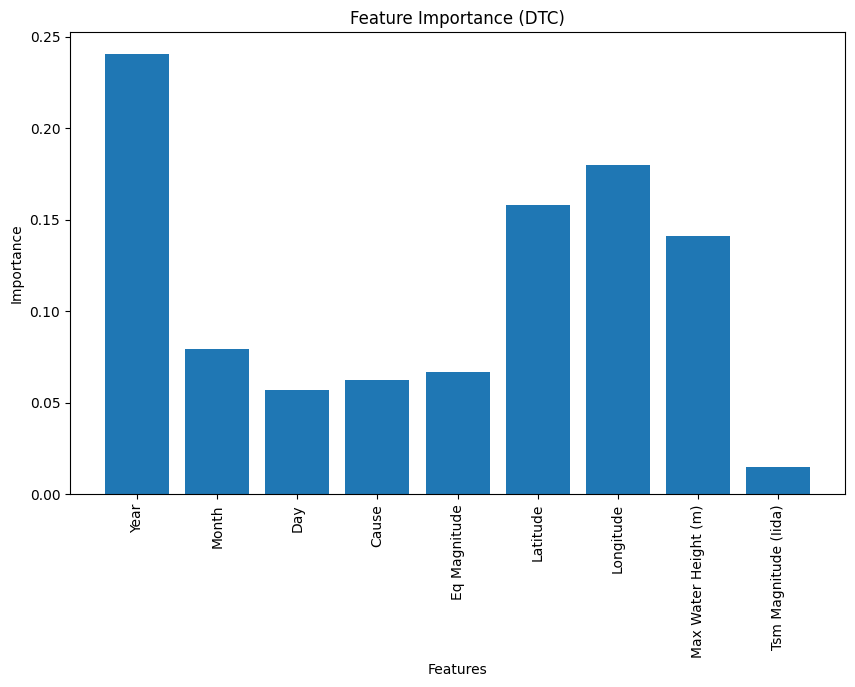

In [ ]:
# Model : DTC
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(x_train, y_train)

# Retrieving feature importance
feature_importance_dtc = dtc_model.feature_importances_

# Get feature names from your dataset
feature_names = x_train.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_dtc)), feature_importance_dtc, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (DTC)')
plt.xticks(rotation=90)
plt.show()

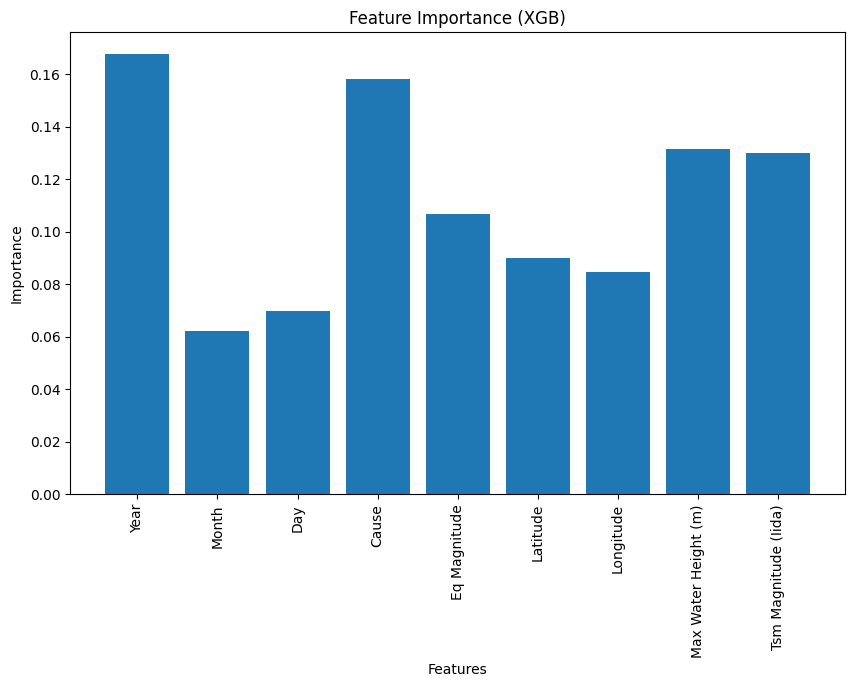

In [ ]:
# Model : XGB
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

# Retrieve feature importance
feature_importance_xgb = xgb_model.feature_importances_

# Get feature names from your dataset
feature_names = x_train.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_xgb)), feature_importance_xgb, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (XGB)')
plt.xticks(rotation=90)
plt.show()

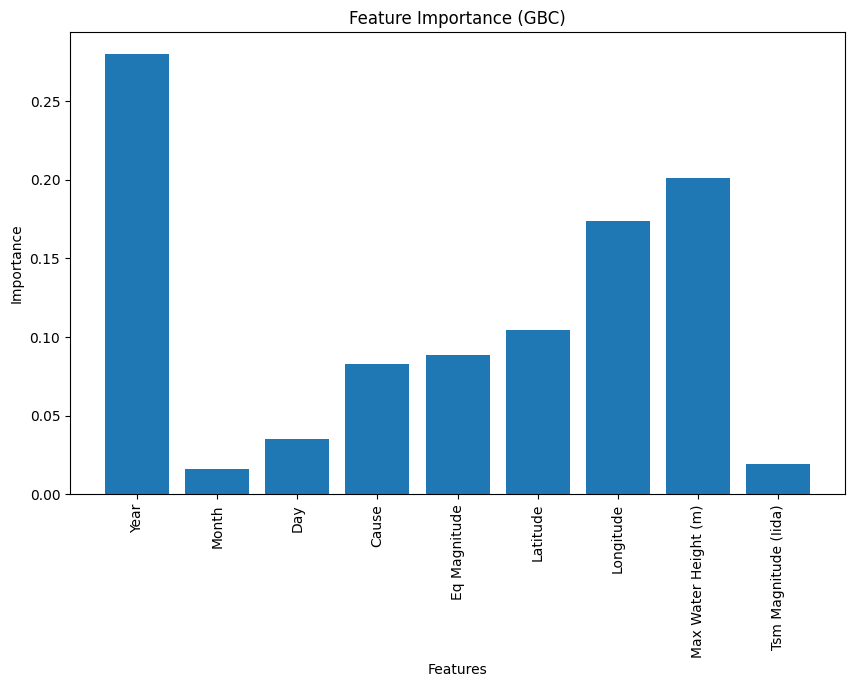

In [ ]:
# Model : GBC
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(x_train, y_train)

# Retrieving feature importance
feature_importance_gbc = gbc_model.feature_importances_

# Get feature names from your dataset
feature_names = x_train.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_gbc)), feature_importance_gbc, tick_label=feature_names)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (GBC)')
plt.xticks(rotation=90)
plt.show()